# Training Notebook

### Import libraries and magic

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

## Dataset 1: Flower Species Dataset

In [5]:
X_train_flower = np.load('flower_species_classification/data_train.npy').reshape(-1, 300, 300, 3) / 255.0
y_train_flower = np.load('flower_species_classification/labels_train.npy')
y_train_flower_one_hot = tf.keras.utils.to_categorical(y_train_flower, num_classes=10)

X_train_flower.shape, y_train_flower.shape

((1658, 300, 300, 3), (1658,))

In [6]:
# Build Flower Model

flower_model = Sequential([
    Input(shape=(300, 300, 3)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

flower_model.compile(optimizer=Adam(learning_rate=0.001),
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

flower_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 270000)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │   138,240,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,374,410 (527.86 MB)

 Trainable params: 138,374,410 (527.86 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Train Flower Model

flower_callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6),
    ModelCheckpoint('flower_classifier.keras', save_best_only=True)
]

flower_history = flower_model.fit(X_train_flower, y_train_flower_one_hot,
                                  validation_split=0.2,
                                  epochs=30,
                                  batch_size=32,
                                  callbacks=flower_callbacks)

Epoch 1/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.1044 - loss: 99.9078 - val_accuracy: 0.1024 - val_loss: 2.3021 - learning_rate: 0.0010
Epoch 2/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.1001 - loss: 2.4374 - val_accuracy: 0.1084 - val_loss: 2.3009 - learning_rate: 0.0010
Epoch 3/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 41s 946ms/step - accuracy: 0.0988 - loss: 2.2992 - val_accuracy: 0.1205 - val_loss: 2.3000 - learning_rate: 0.0010
Epoch 4/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.1276 - loss: 2.3010 - val_accuracy: 0.1205 - val_loss: 2.2992 - learning_rate: 0.0010
Epoch 5/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.1268 - loss: 2.3027 - val_accuracy: 0.1205 - val_loss: 2.2986 - learning_rate: 0.0010
Epoch 6/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.1167 - loss: 2.2990 - val_accuracy: 0.1205 - val_loss: 2.2980 - learning_rate: 0.0010
Epoch 7/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.1234 - loss: 2.2967 - val_accura

In [8]:
# Save Flower Model Training History

np.save('flower_species_classification/flower_training_history.npy', flower_history.history)

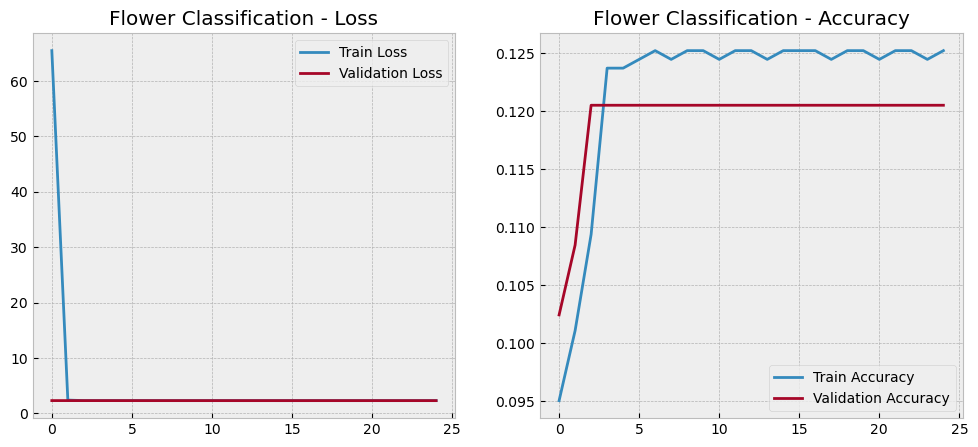

In [9]:
# Plot Training Results

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(flower_history.history['loss'], label='Train Loss')
plt.plot(flower_history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Flower Classification - Loss')
plt.subplot(1, 2, 2)
plt.plot(flower_history.history['accuracy'], label='Train Accuracy')
plt.plot(flower_history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Flower Classification - Accuracy')
plt.savefig("flower.png", format="png")
plt.show()

## Dataset 2: Car Detection Dataset

In [12]:
car_annotations = pd.read_csv('car_detection_dataset/train_bounding_boxes.csv')
X_train_car = np.array([plt.imread('car_detection_dataset/training_images/' + img) for img in car_annotations['image']])
y_train_car = car_annotations.iloc[:, 1:].values
X_train_car = X_train_car / 255.0  # Normalize

In [13]:
# Build Car Detection Model

car_model = Sequential([
    Input(shape=(380, 676, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(4, activation='linear')
])

# Compile Car Detection Model

car_model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='mse', metrics=['mae'])

car_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 378, 674, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 189, 337, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 187, 335, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 93, 167, 64)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 993984)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │   127,230,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 127,249,988 (485.42 MB)

 Trainable params: 127,249,988 (485.42 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Train Car Detection Model

car_callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6),
    ModelCheckpoint('car_detector.keras', save_best_only=True)
]

car_history = car_model.fit(X_train_car, y_train_car,
                            validation_split=0.2,
                            epochs=30,
                            batch_size=16,
                            callbacks=car_callbacks)

Epoch 1/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 119s 4s/step - loss: 41876.5547 - mae: 149.7740 - val_loss: 26335.9551 - val_mae: 113.7770 - learning_rate: 0.0010
Epoch 2/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 93s 3s/step - loss: 21622.7207 - mae: 101.6738 - val_loss: 23970.2871 - val_mae: 105.1070 - learning_rate: 0.0010
Epoch 3/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 100s 4s/step - loss: 20538.8281 - mae: 96.4152 - val_loss: 23349.1895 - val_mae: 104.3259 - learning_rate: 0.0010
Epoch 4/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 98s 4s/step - loss: 19865.1133 - mae: 95.1808 - val_loss: 22960.0605 - val_mae: 102.5446 - learning_rate: 0.0010
Epoch 5/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 96s 3s/step - loss: 18561.2656 - mae: 93.0579 - val_loss: 24692.7949 - val_mae: 104.0051 - learning_rate: 0.0010
Epoch 6/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 106s 4s/step - loss: 17685.5859 - mae: 89.6306 - val_loss: 20869.6367 - val_mae: 101.5120 - learning_rate: 0.0010
Epoch 7/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 104s 4s/step - loss: 13271.4932 - mae: 74.9414 - va

In [15]:
# Save Car Model Training History

np.save('car_detection_dataset/car_training_history.npy', car_history.history)

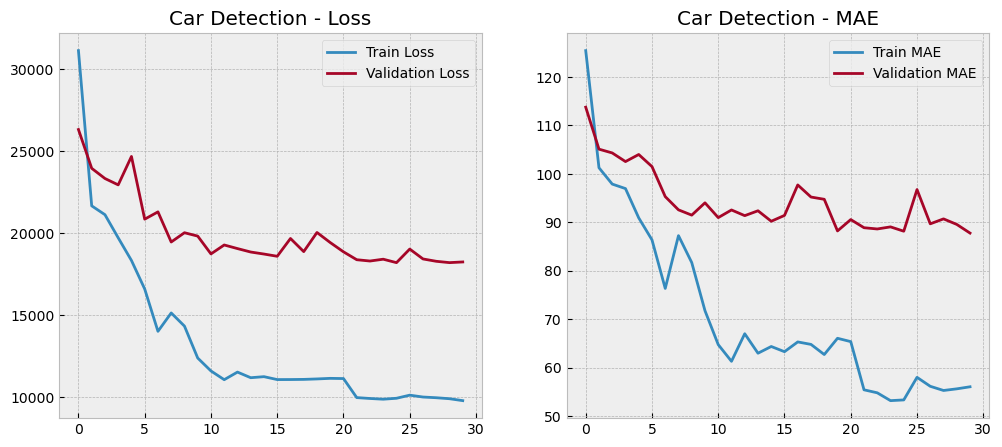

In [16]:
# Plot Training Results

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(car_history.history['loss'], label='Train Loss')
plt.plot(car_history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Car Detection - Loss')
plt.subplot(1, 2, 2)
plt.plot(car_history.history['mae'], label='Train MAE')
plt.plot(car_history.history['val_mae'], label='Validation MAE')
plt.legend()
plt.title('Car Detection - MAE')
plt.savefig("car.png", format="png")
plt.show()